<a href="https://colab.research.google.com/github/LCA9/Previsao-Jogos-Brasileirao/blob/main/Previsao_Partidas_Brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Country = País 

>Home = Time da Casa

>Away = Time Visitante

>HG = Gols do time da casa

>AG = Gols do time visitante

>Res = Resultado do jogo (D = Draw, H = Home win, A = Away win)

>PH = Odd vitória time da casa (Pinacle).

>PD = Odd emapate (Pinacle).

>PA = Odd vitória time visitante (Pinacle).

>MaxH = Odd vitória time da casa (OddsPortal).

>MaxD = Odd emapate (OddsPortal).

>MaxA = Odd vitória time visitante (OddsPortal).

>AvgH = Odd média de vitória time da casa (OddsPortal).

>AvgD = Odd média de emapate (OddsPortal).

>AvgA = Odd média de vitória time visitante (OddsPortal).

In [ ]:
! pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [ ]:
dados = pd.read_csv("BRA.csv")

# Análise Inicial

In [ ]:
dados.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
dados.shape

(3839, 19)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  3839 non-null   object 
 1   League   3839 non-null   object 
 2   Season   3839 non-null   int64  
 3   Date     3839 non-null   object 
 4   Time     3839 non-null   object 
 5   Home     3839 non-null   object 
 6   Away     3839 non-null   object 
 7   HG       3838 non-null   float64
 8   AG       3838 non-null   float64
 9   Res      3838 non-null   object 
 10  PH       3838 non-null   float64
 11  PD       3838 non-null   float64
 12  PA       3838 non-null   float64
 13  MaxH     3839 non-null   float64
 14  MaxD     3839 non-null   float64
 15  MaxA     3839 non-null   float64
 16  AvgH     3839 non-null   float64
 17  AvgD     3839 non-null   float64
 18  AvgA     3839 non-null   float64
dtypes: float64(11), int64(1), object(7)
memory usage: 570.0+ KB


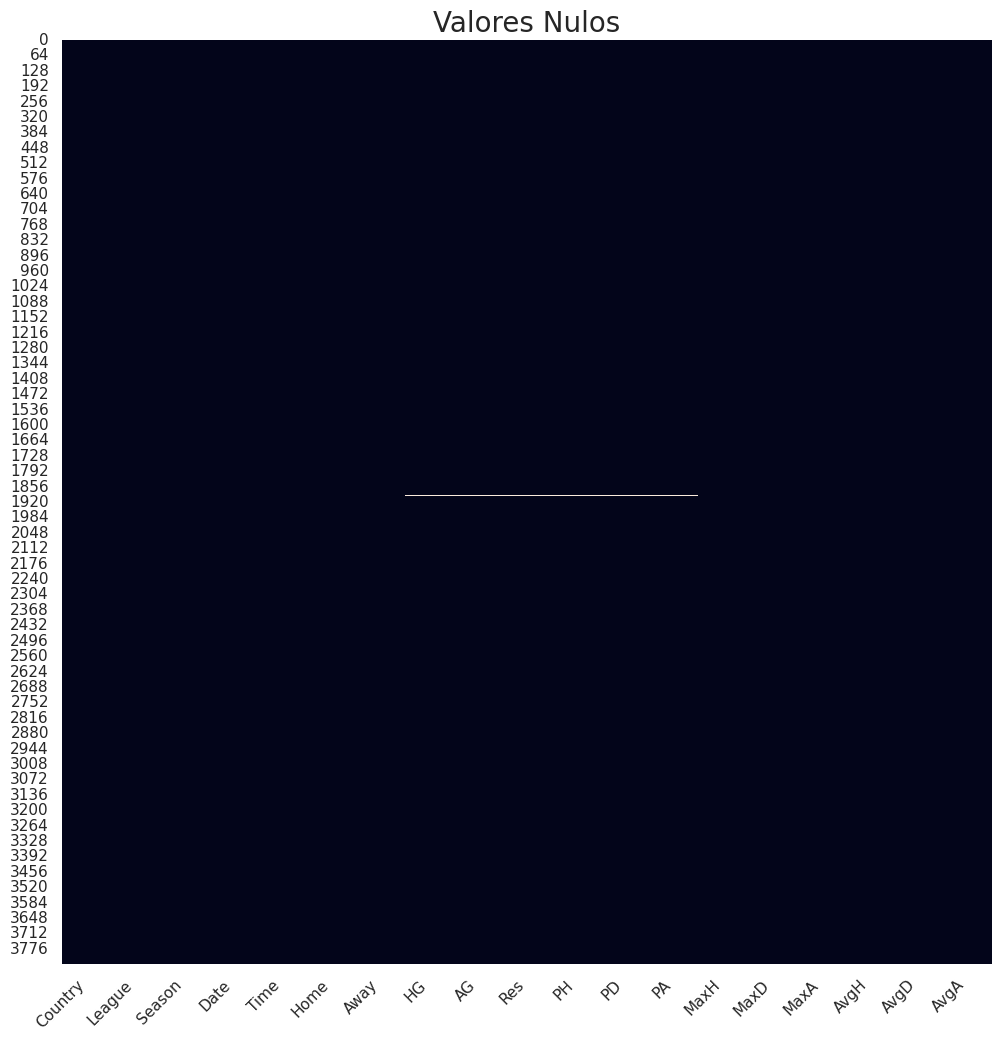

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dados.isnull(), cbar=False);
plt.title("Valores Nulos", fontsize=20)
plt.xticks(ha="right", rotation=45);

In [ ]:
dados.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [ ]:
dados.duplicated().sum()


0

In [ ]:
dados.Home.unique(), dados.Home.nunique()

(array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
        'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
        'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
        'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
        'Gremio', 'Vitoria', 'Criciuma', 'Atletico-PR', 'Goias',
        'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
        'Parana', 'Ceara', 'Athletico-PR', 'CSA', 'Fortaleza',
        'Bragantino', 'Cuiaba', 'Juventude'], dtype=object),
 37)

In [ ]:
dados.Time.unique(), dados.Time.nunique()

(array(['22:30', '01:00', '20:00', '23:30', '00:30', '01:50', '21:00',
        '20:20', '02:00', '22:50', '19:00', '21:30', '00:00', '19:20',
        '23:50', '23:00', '18:00', '20:30', '00:50', '01:30', '22:00',
        '18:30', '15:00', '14:00', '01:45', '23:15', '20:15', '00:45',
        '19:30', '13:00', '23:45', ' 22:30', ' 00:30', ' 22:15', ' 23:00',
        '22:15', '21:15', '21:45', '22:45'], dtype=object),
 39)

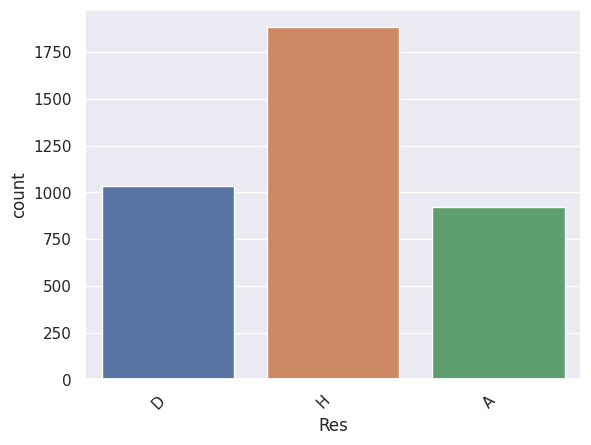

In [ ]:
sns.countplot(x='Res',data=dados)
plt.xticks(ha="right", rotation=45);

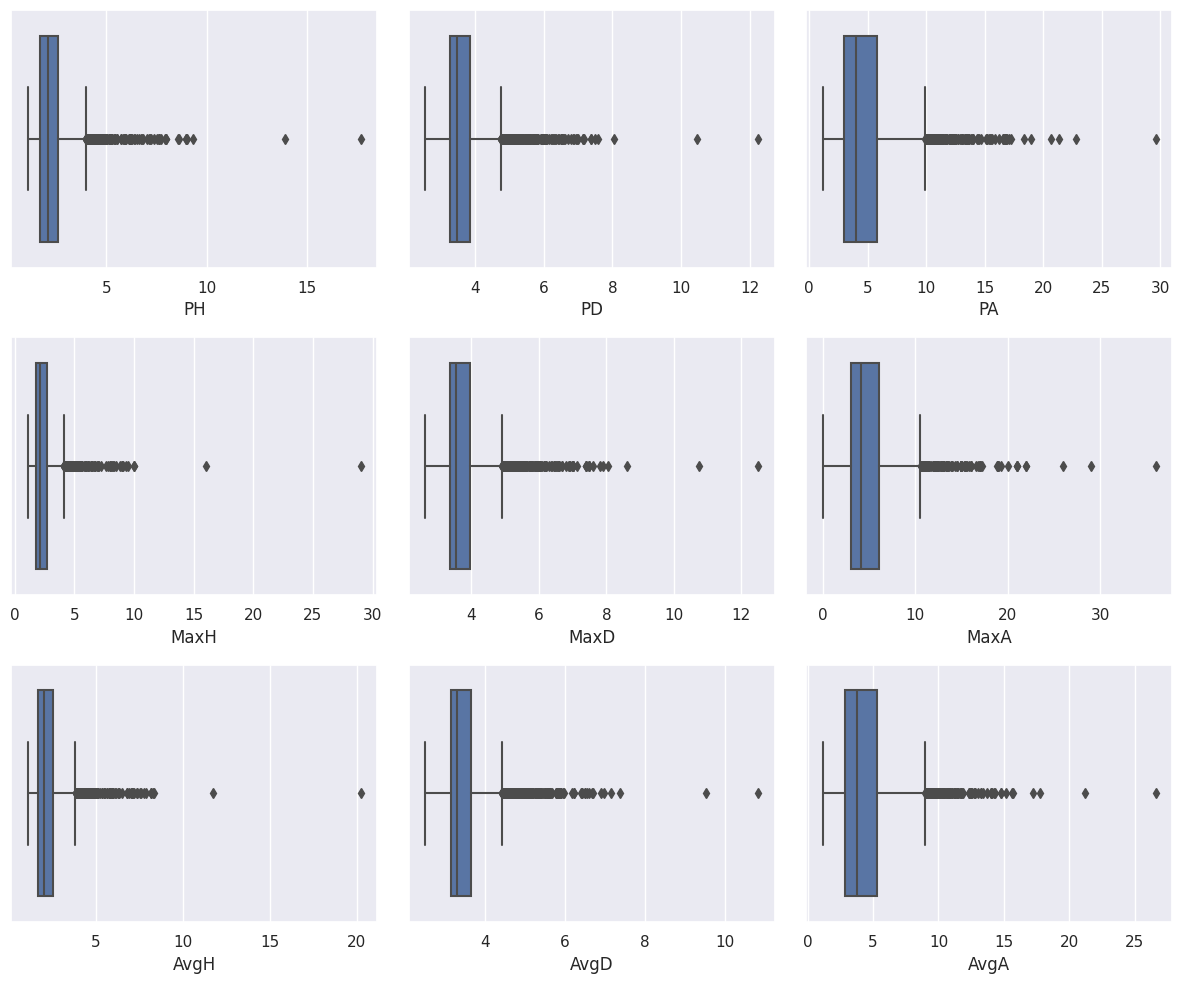

In [ ]:
j = dados.loc[:,['PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA','AvgH', 'AvgD', 'AvgA']]

plt.figure(figsize=(12,10))
for x,y in enumerate(j.columns):
  plt.subplot(3,3,x+1)
  sns.boxplot(data=dados, x=y)
plt.tight_layout();

# Analytics

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3)

trace0 = go.Histogram(x=dados.PH, nbinsx=20, name="PH")
trace1 = go.Histogram(x=dados.MaxH, nbinsx = 20, name="MaxH")
trace2 = go.Histogram(x=dados.AvgH, nbinsx=20, name="AvgH")
trace3 = go.Histogram(x=dados.PA, nbinsx=20, name="PA")
trace4 = go.Histogram(x=dados.MaxA, nbinsx=20, name="MaxA")
trace5 = go.Histogram(x=dados.AvgA, nbinsx=20, name="AvgA")
trace6 = go.Histogram(x=dados.PD, nbinsx=20, name="PD")
trace7 = go.Histogram(x=dados.MaxD, nbinsx=20, name="MaxD")
trace8 = go.Histogram(x=dados.AvgD, nbinsx=20, name="AvgD")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

fig.update_layout(title_text='Análise das Odds')
fig.show()

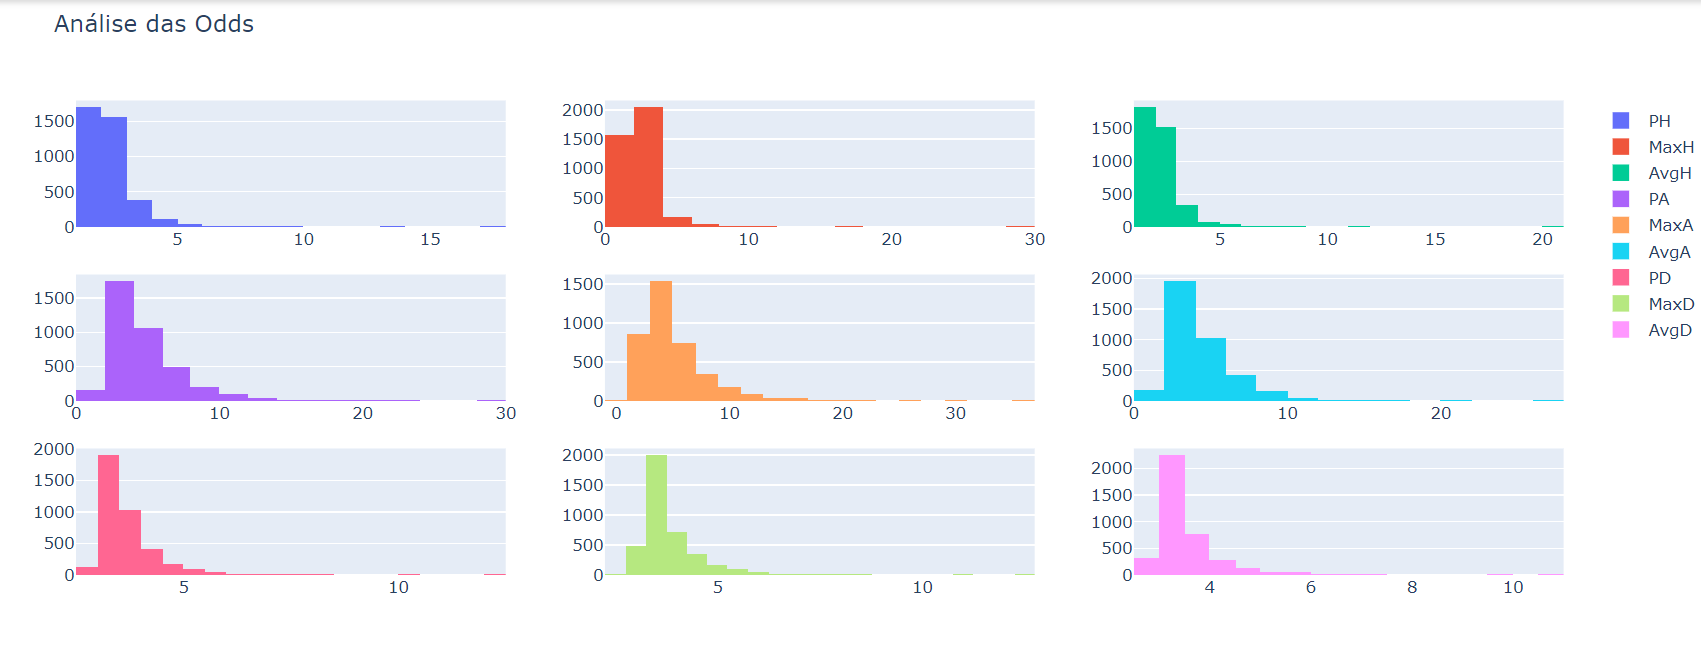

Infelizmente os gráficos da bibilioteca plotly.express não aparecem quando copiados o notebook para o github. Acima está uma foto de como ficaria o gráfico.

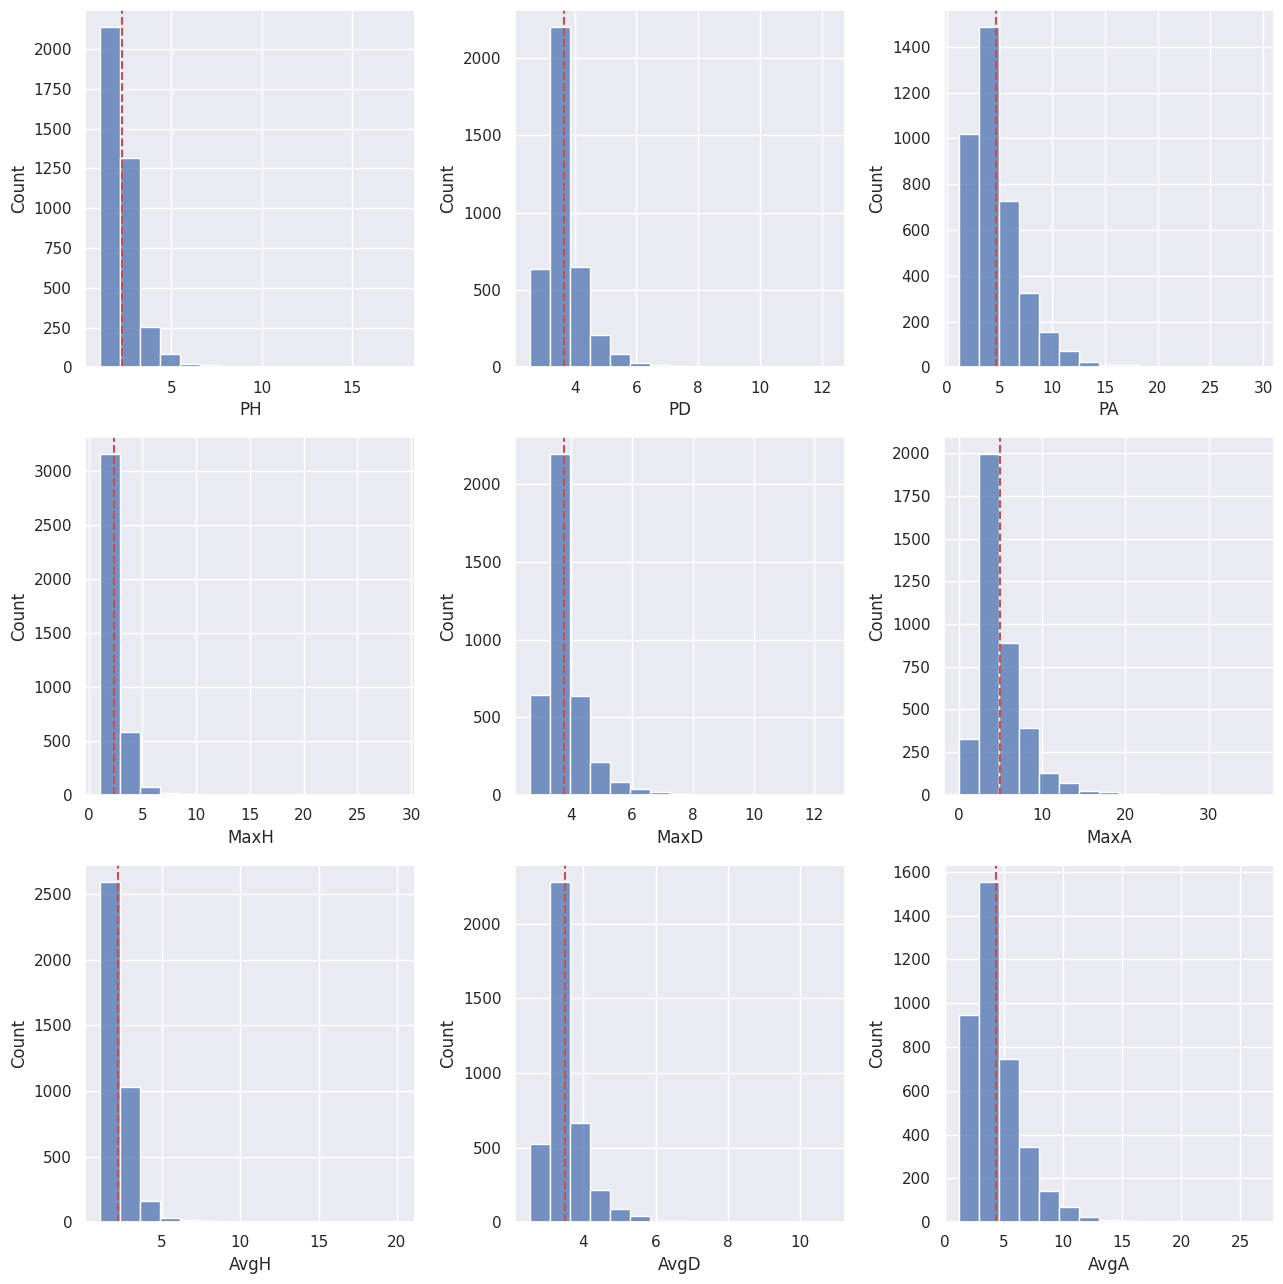

In [ ]:
# Mesmo Gráfico de cima, porém utilizando outra biblioteca
plt.figure(figsize=(13,13))
for x,y in enumerate(j.columns):
  plt.subplot(3,3,x+1)
  sns.histplot(data=dados, x=y, bins=15).axvline(dados[y].mean(), color = "r", ls = "--")
plt.tight_layout();

In [ ]:
print("Analise das Odds - Vítoria Time da Casa"), dados[dados['Res']=='H'].describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,2016.481934,2.149841,0.471307,2.061732,3.778140,5.340282,2.126833,3.887933,5.671169,2.000776,3.588571,4.882774
std,2.870581,1.035711,0.652542,0.689541,0.755697,2.754611,0.723257,0.783895,3.116828,0.633012,0.651443,2.343531
min,2012.000000,1.000000,0.000000,1.080000,2.740000,1.370000,1.090000,2.850000,1.430000,1.070000,2.700000,1.370000
25%,2014.000000,1.000000,0.000000,1.600000,3.300000,3.390000,1.640000,3.390000,3.482500,1.562500,3.182500,3.200000
50%,2016.000000,2.000000,0.000000,1.910000,3.540000,4.610000,1.970000,3.650000,4.820000,1.870000,3.370000,4.260000
75%,2019.000000,3.000000,1.000000,2.340000,4.030000,6.567500,2.427500,4.150000,7.000000,2.280000,3.800000,5.970000
max,2022.000000,6.000000,3.000000,8.560000,12.250000,29.580000,8.800000,12.500000,36.000000,7.870000,10.820000,26.580000


In [ ]:
print("Analise das Odds - Vítoria Time Visitante"), dados[dados['Res']=='A'].describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,2016.607375,0.521692,1.984816,2.705857,3.526193,3.814588,2.805965,3.616356,3.970998,2.591345,3.365304,3.544447
std,2.929847,0.700602,0.933039,1.214668,0.477537,1.948713,1.313280,0.490785,2.065162,1.091829,0.402166,1.640692
min,2012.000000,0.000000,1.000000,1.210000,2.840000,1.250000,1.260000,2.900000,1.310000,1.220000,2.770000,1.240000
25%,2014.000000,0.000000,1.000000,1.932500,3.240000,2.540000,1.992500,3.310000,2.610000,1.890000,3.120000,2.442500
50%,2017.000000,0.000000,2.000000,2.450000,3.390000,3.205000,2.505000,3.475000,3.300000,2.370000,3.250000,3.040000
75%,2019.000000,1.000000,2.000000,3.067500,3.660000,4.467500,3.180000,3.750000,4.690000,2.937500,3.480000,4.140000
max,2022.000000,4.000000,6.000000,13.920000,6.990000,18.910000,16.000000,6.990000,18.910000,11.740000,5.770000,13.250000


## Vasco

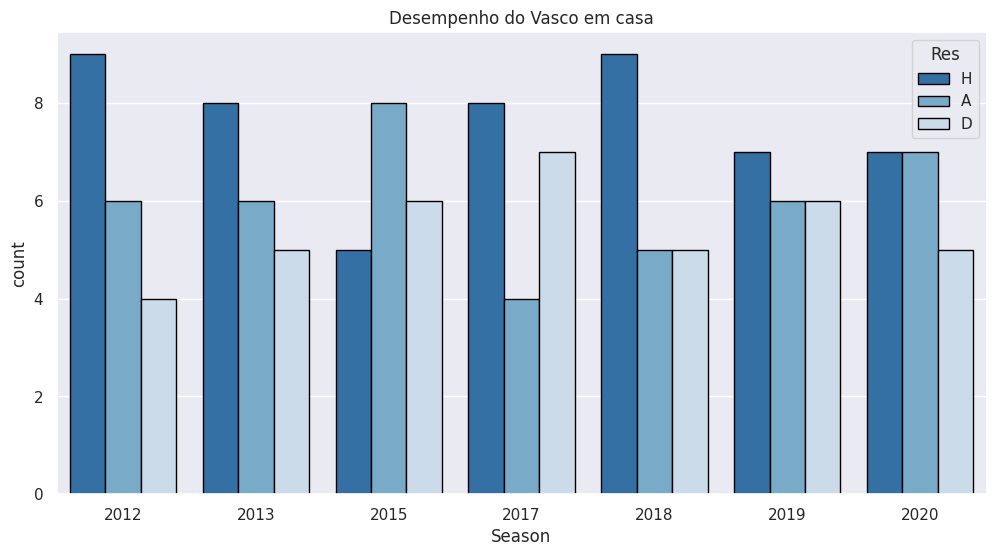

In [ ]:
plt.figure(figsize=(12,6))

plt.title("Desempenho do Vasco em casa")
sns.countplot(data=dados.loc[dados['Home']=='Vasco'] , x='Season', hue='Res', palette='Blues_r',linewidth=1.0, edgecolor='black',);

In [ ]:
print("Times que o vasco Mais Venceu Como Mandante:"), 
dados.loc[(dados['Home']=='Vasco') & (dados['Res']=='H')].groupby('Away')['Country'].count().sort_values(ascending=False)

Times que o vasco Mais Venceu Como Mandante:


Away
Sport Recife      4
Botafogo RJ       4
Fluminense        3
Cruzeiro          3
Gremio            3
Santos            3
Sao Paulo         3
Atletico-MG       3
Bahia             2
Avai              2
Portuguesa        2
Ponte Preta       2
Nautico           2
Atletico GO       2
Internacional     2
Parana            1
Palmeiras         1
America MG        1
Goias             1
Fortaleza         1
Athletico-PR      1
Figueirense       1
Criciuma          1
Coritiba          1
Chapecoense-SC    1
Ceara             1
Atletico-PR       1
Flamengo RJ       1
Name: Country, dtype: int64

In [ ]:
print("Times que o vasco Mais Venceu Como Visitante:"), 
dados.loc[(dados['Away']=='Vasco') & (dados['Res']=='A')].groupby('Home')['Country'].count().sort_values(ascending=False)

Times que o vasco Mais Venceu Como Visitante:


Home
Fluminense        5
Coritiba          2
Sport Recife      2
Atletico-MG       2
Atletico GO       2
CSA               1
Ceara             1
Avai              1
Sao Paulo         1
Santos            1
Portuguesa        1
Ponte Preta       1
Palmeiras         1
Nautico           1
Joinville         1
Internacional     1
Goias             1
Bahia             1
Flamengo RJ       1
Cruzeiro          1
Botafogo RJ       1
Chapecoense-SC    1
Vitoria           1
Name: Country, dtype: int64

#Removendo Colunas e Valores Nulos

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.drop(['Time','Country','League','Season','Date','HG','AG'], axis=1, inplace=True)

In [ ]:
dados.head()

,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Palmeiras,Portuguesa,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Sport Recife,Flamengo RJ,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Figueirense,Nautico,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Botafogo RJ,Sao Paulo,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Corinthians,Fluminense,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
# Deletar
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 3838
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Home    3838 non-null   object 
 1   Away    3838 non-null   object 
 2   Res     3838 non-null   object 
 3   PH      3838 non-null   float64
 4   PD      3838 non-null   float64
 5   PA      3838 non-null   float64
 6   MaxH    3838 non-null   float64
 7   MaxD    3838 non-null   float64
 8   MaxA    3838 non-null   float64
 9   AvgH    3838 non-null   float64
 10  AvgD    3838 non-null   float64
 11  AvgA    3838 non-null   float64
dtypes: float64(9), object(3)
memory usage: 389.8+ KB


# **Substituindo Valores e Mundando seu Tipo**

Empate = D = 0

Vitória Time da Casa = H = 1

Vitória Time Vistitante = A = 2

**Legenda:**

'Palmeiras':"1",                

'Sport Recife':"2", 

'Figueirense':"3", 

'Botafogo RJ':"4",

'Corinthians':"5", 

'Internacional':"6", 

'Ponte Preta':"7",

'Bahia':"8", 

'Cruzeiro':"9",

'Vasco':"10", 

'Atletico GO':"11", 

'Flamengo RJ':"12", 

'Portuguesa':"13", 

 'Nautico':"14",

'Atletico-MG':"15", 

'Coritiba':"16", 

 'Santos':"17", 

'Sao Paulo':"18", 

'Fluminense':"19",

'Gremio':"20", 

'Vitoria':"21", 

'Criciuma':"22", 

'Atletico-PR':"23", 

'Goias':"24",

'Chapecoense-SC':"25", 

'Avai':"26", 

'Joinville':"27", 

'Santa Cruz':"28", 

'America MG':"29",

'Parana':"30", 

'Ceara':"31", 

'Athletico-PR':"32", 

'CSA':"33", 

'Fortaleza':"34",

'Bragantino':"35", 

'Cuiaba':"36", 

'Juventude':"37"

In [ ]:
dados['Home'].unique()

array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
       'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
       'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
       'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
       'Gremio', 'Vitoria', 'Criciuma', 'Atletico-PR', 'Goias',
       'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
       'Parana', 'Ceara', 'Athletico-PR', 'CSA', 'Fortaleza',
       'Bragantino', 'Cuiaba', 'Juventude'], dtype=object)

In [ ]:
dados['Home'] = dados['Home'].map({'Palmeiras':"1", 'Sport Recife':"2", 'Figueirense':"3", 'Botafogo RJ':"4",
       'Corinthians':"5", 'Internacional':"6", 'Ponte Preta':"7", 'Bahia':"8", 'Cruzeiro':"9",
       'Vasco':"10", 'Atletico GO':"11", 'Flamengo RJ':"12", 'Portuguesa':"13", 'Nautico':"14",
       'Atletico-MG':"15", 'Coritiba':"16", 'Santos':"17", 'Sao Paulo':"18", 'Fluminense':"19",
       'Gremio':"20", 'Vitoria':"21", 'Criciuma':"22", 'Atletico-PR':"23", 'Goias':"24",
       'Chapecoense-SC':"25", 'Avai':"26", 'Joinville':"27", 'Santa Cruz':"28", 'America MG':"29",
       'Parana':"30", 'Ceara':"31", 'Athletico-PR':"32", 'CSA':"33", 'Fortaleza':"34",
       'Bragantino':"35", 'Cuiaba':"36", 'Juventude':"37"})

In [ ]:
dados['Away'] = dados['Away'].map({'Palmeiras':"1", 'Sport Recife':"2", 'Figueirense':"3", 'Botafogo RJ':"4",
       'Corinthians':"5", 'Internacional':"6", 'Ponte Preta':"7", 'Bahia':"8", 'Cruzeiro':"9",
       'Vasco':"10", 'Atletico GO':"11", 'Flamengo RJ':"12", 'Portuguesa':"13", 'Nautico':"14",
       'Atletico-MG':"15", 'Coritiba':"16", 'Santos':"17", 'Sao Paulo':"18", 'Fluminense':"19",
       'Gremio':"20", 'Vitoria':"21", 'Criciuma':"22", 'Atletico-PR':"23", 'Goias':"24",
       'Chapecoense-SC':"25", 'Avai':"26", 'Joinville':"27", 'Santa Cruz':"28", 'America MG':"29",
       'Parana':"30", 'Ceara':"31", 'Athletico-PR':"32", 'CSA':"33", 'Fortaleza':"34",
       'Bragantino':"35", 'Cuiaba':"36", 'Juventude':"37"})

In [ ]:
dados['Res'] = dados['Res'].map({"D":0,"H":1,"A":2})

In [ ]:
dados.head()

,Home,Away,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1,13,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2,12,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,3,14,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4,18,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,5,19,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
dados['Home'] = pd.to_numeric(dados['Home'])
dados['Away'] = pd.to_numeric(dados['Away'])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 3838
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Home    3838 non-null   int64  
 1   Away    3838 non-null   int64  
 2   Res     3838 non-null   int64  
 3   PH      3838 non-null   float64
 4   PD      3838 non-null   float64
 5   PA      3838 non-null   float64
 6   MaxH    3838 non-null   float64
 7   MaxD    3838 non-null   float64
 8   MaxA    3838 non-null   float64
 9   AvgH    3838 non-null   float64
 10  AvgD    3838 non-null   float64
 11  AvgA    3838 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 389.8 KB


In [ ]:
dados.columns

Index(['Home', 'Away', 'Res', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA'],
      dtype='object')

In [ ]:
dados = dados.reindex(columns = ['Home', 'Away', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH','AvgD', 'AvgA', 'Res'])

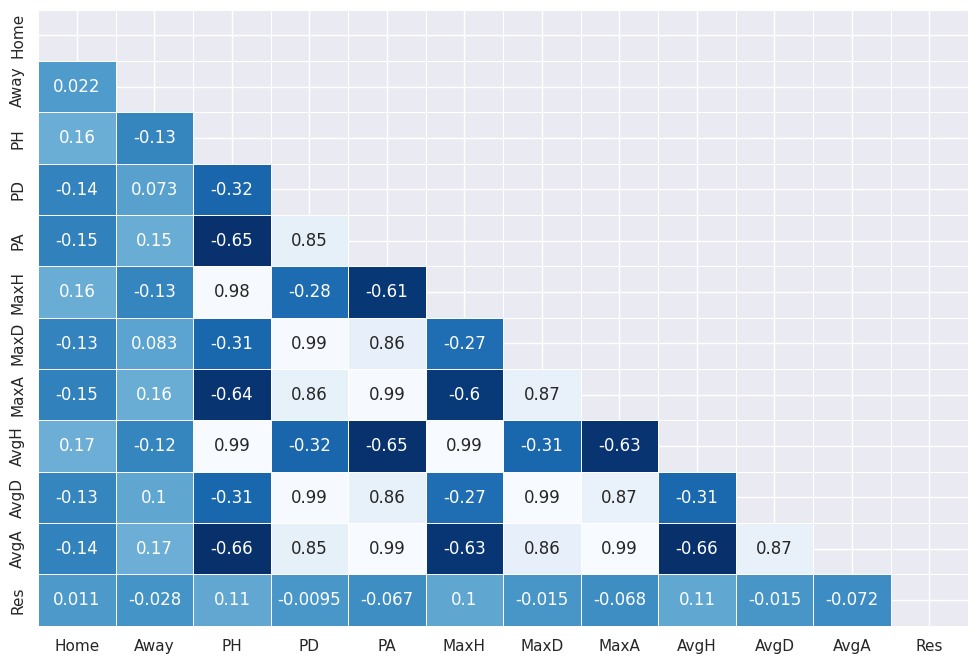

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dados.corr(),  cbar=False, mask=np.triu(dados.corr()), annot=True,linewidth=0.7, linecolor='white', cmap = 'Blues_r');

Analisando a Matriz de Correlação é possivel ver que houve Multicolinearidade entre as features.

AvgH, PH e MaxH apresentam a mesma informação. Será necessario deletar 2 features

AvgA, PA e MaxA apresentam a mesma informação. Será necessario deletar 2 features.

AvgD, PD e MaxD apresentam a mesma informação. Será necessario deletar 2 features.

# Selecionando as Melhores Features

## Padronizando

In [ ]:
x = dados.iloc[:, 0:11].values
y = dados.iloc[:, 11].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2 = StandardScaler().fit_transform(x)

## Separação Entre Dados de Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X_esc2, y, test_size=0.2, random_state=0)

x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((3070, 11), (3070,), (768, 11), (768,))

## Padronização

In [ ]:
x = dados.iloc[:, 0:11].values
y = dados.iloc[:, 11].values

In [ ]:
x, y

(array([[ 1.  , 13.  ,  1.75, ...,  1.69,  3.5 ,  4.9 ],
        [ 2.  , 12.  ,  2.83, ...,  2.59,  3.23,  2.58],
        [ 3.  , 14.  ,  1.6 , ...,  1.59,  3.67,  5.64],
        ...,
        [16.  , 19.  ,  2.53, ...,  2.5 ,  2.94,  3.14],
        [ 6.  , 26.  ,  1.53, ...,  1.52,  3.9 ,  6.93],
        [18.  , 17.  ,  1.65, ...,  1.63,  3.66,  5.92]]),
 array([0, 0, 1, ..., 1, 0, 1]))

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2 = StandardScaler().fit_transform(x)

## Shap

In [ ]:
! pip install shap
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.1 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
model = XGBClassifier(random_state=10).fit(x_treino, y_treino)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(x_teste)

In [ ]:
dados.columns

Index(['Home', 'Away', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'Res'],
      dtype='object')

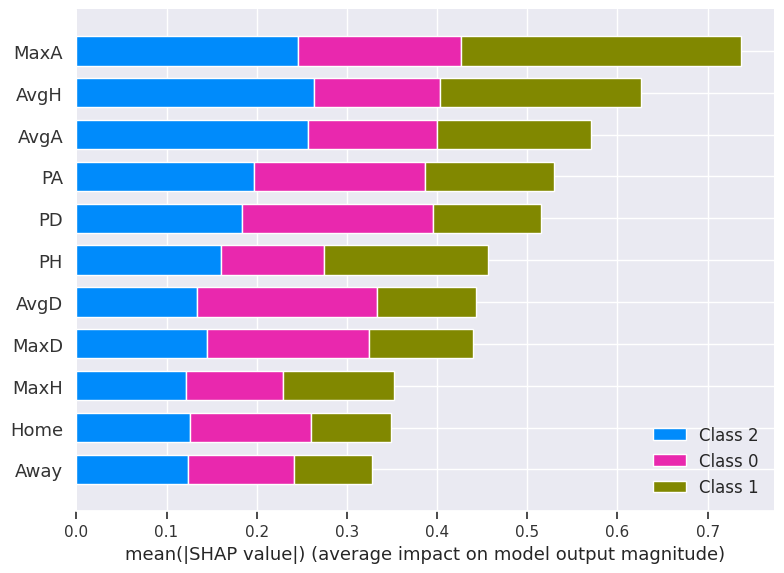

In [ ]:
shap.summary_plot(shap_values,  x_teste, plot_type="bar", feature_names =['Home', 'Away', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH','AvgD', 'AvgA'])

# Removendo Colunas - Part 2

In [ ]:
dados.drop(['PH', 'PA', 'MaxH', 'MaxD', 'AvgD', 'AvgA'], axis = 1, inplace = True)

In [ ]:
dados.head()

,Home,Away,PD,MaxA,AvgH,Res
0,1,13,3.86,5.31,1.69,0
1,2,12,3.39,2.70,2.59,0
2,3,14,4.04,7.22,1.59,1
3,4,18,3.35,3.15,2.35,1
4,5,19,3.53,4.41,1.89,2


#Padronizando

In [ ]:
x_pad = dados.iloc[:, 0:5].values
y_pad = dados.iloc[:, 5].values

In [ ]:
from sklearn.preprocessing import StandardScaler
x_esc_pad = StandardScaler().fit_transform(x_pad)

# Separação Dados em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

x_treino_pad, x_teste_pad, y_treino_pad, y_teste_pad = train_test_split(x_esc_pad, y_pad, test_size=0.2, random_state=0)

In [ ]:
x_treino_pad.shape

(3070, 5)

# Modelos

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arv1 = DecisionTreeClassifier(max_depth=1, random_state=10)
arv2 = DecisionTreeClassifier(max_depth=2, random_state=10)

###Bayesian Optimization - Otimização Bayesiana

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical

In [ ]:
def treinar_adab(params):

  algorithm = params[0]
  base_estimator = params[1]
  learning_rate = params[2]
  n_estimators = params[3]

  print(params)

  mo_adab = AdaBoostClassifier( algorithm = algorithm,
                                base_estimator = base_estimator, 
                                learning_rate = learning_rate, n_estimators=n_estimators, random_state=10)
  
  
  re = mo_adab.fit(x_treino_pad, y_treino_pad)                    
  return -re.score(x_teste_pad, y_teste_pad)

In [ ]:
space_adab=[['SAMME', 'SAMME.R'], # algorithm
      Categorical([arv1, arv2]), # base_estimator
      (0.001,0.1), # learning_rate 
      (100,1000) # n_estimators
]

In [ ]:
gp_resultados_adab = gp_minimize(treinar_adab,space_adab,random_state=10,verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
['SAMME', DecisionTreeClassifier(max_depth=1, random_state=10), 0.04485847982117224, 849]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.4072
Function value obtained: -0.4948
Current minimum: -0.4948
Iteration No: 2 started. Evaluating function at random point.
['SAMME.R', DecisionTreeClassifier(max_depth=1, random_state=10), 0.0712115929744582, 339]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.8495
Function value obtained: -0.4922
Current minimum: -0.4948
Iteration No: 3 started. Evaluating function at random point.
['SAMME', DecisionTreeClassifier(max_depth=1, random_state=10), 0.0686980245067622, 835]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.4034
Function value obtained: -0.4948
Current minimum: -0.4948
Iteration No: 4 started. Evaluating function at random point.
['SAMME', DecisionTreeClassifier(max_depth=2, random_state=10), 0.02061405949026406

In [ ]:
gp_resultados_adab.x

['SAMME',
 DecisionTreeClassifier(max_depth=1, random_state=10),
 0.004066344366306572,
 581]

### Avaliando Modelo

In [ ]:
modelo_adab_ava = AdaBoostClassifier( algorithm ='SAMME' ,
  base_estimator = DecisionTreeClassifier(max_depth=1, random_state=10) ,
  learning_rate = 0.004066344366306572,
  n_estimators =581 , random_state=10)

In [ ]:
modelo_adab_ava.fit(x_treino_pad, y_treino_pad)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=10),
                   learning_rate=0.004066344366306572, n_estimators=581,
                   random_state=10)

In [ ]:
adab_predict = modelo_adab_ava.predict(x_teste_pad )

In [ ]:
print(classification_report(y_teste_pad,adab_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.50      0.95      0.66       361
           2       0.44      0.21      0.28       177

    accuracy                           0.50       768
   macro avg       0.31      0.39      0.31       768
weighted avg       0.34      0.50      0.37       768



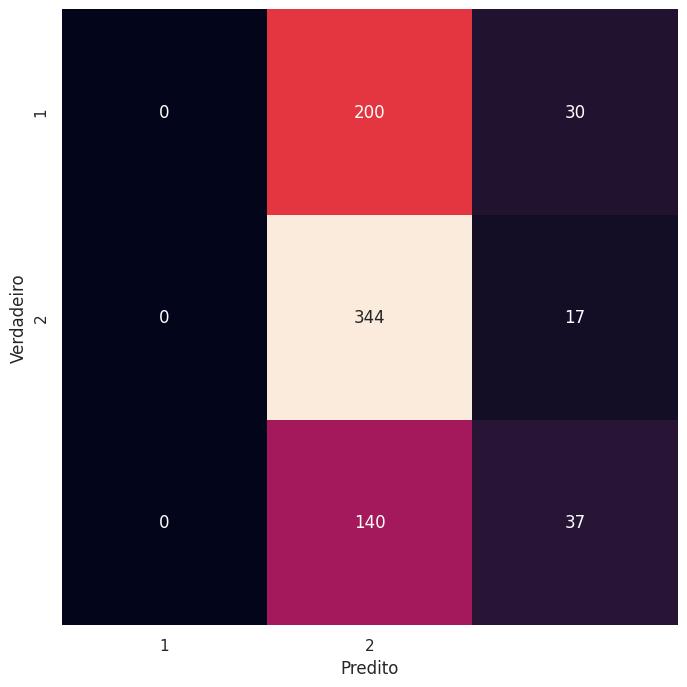

In [ ]:
nomes = np.unique(adab_predict)
matriz_adab= confusion_matrix(y_teste,  adab_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_adab , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf1 = XGBClassifier(random_state=10)
clf2 = lgb.LGBMClassifier(random_state=10)
clf3 = AdaBoostClassifier(random_state=10)

###Bayesian Optimization - Otimização Bayesiana

In [ ]:
from skopt import gp_minimize

In [ ]:
def treinar_vot(params):

  voting = params[0]

  print(params)

  mo_vot = VotingClassifier(estimators=[('xgb', clf1), ('lgbm', clf2), ('adab', clf3)], voting = voting)
  
  
  re = mo_vot.fit(x_treino_pad, y_treino_pad)                    
  return -re.score(x_teste_pad, y_teste_pad)

In [ ]:
space_vot =[['hard','soft']] # voting

In [ ]:
gp_resultados_vot = gp_minimize(treinar_vot, space_vot, verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
['hard']
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0890
Function value obtained: -0.4544
Current minimum: -0.4544
Iteration No: 2 started. Evaluating function at random point.
['soft']
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.0818
Function value obtained: -0.4518
Current minimum: -0.4544
Iteration No: 3 started. Evaluating function at random point.
['hard']
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0708
Function value obtained: -0.4544
Current minimum: -0.4544
Iteration No: 4 started. Evaluating function at random point.
['soft']
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.1063
Function value obtained: -0.4518
Current minimum: -0.4544
Iteration No: 5 started. Evaluating function at random point.
['soft']
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 3.0677
Function value obtained: -0.4518
Curre

In [ ]:
gp_resultados_vot.x

['hard']

### Avaliando Modelo

In [ ]:
modelo_vot_ava =VotingClassifier( estimators=[('xgb', clf1), ('lgbm', clf2), ('adab', clf3)], voting='hard')

In [ ]:
modelo_vot_ava.fit(x_treino_pad, y_treino_pad)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...one, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=10, ...)),
                             ('lgbm', LGBMClassifier(random_state=10)),
                             ('adab', AdaBoostClassifier(random_state=10))])

In [ ]:
adab_predict = modelo_vot_ava.predict(x_teste_pad)

In [ ]:
print(classification_report(y_teste_pad,adab_predict))

              precision    recall  f1-score   support

           0       0.34      0.13      0.18       230
           1       0.50      0.75      0.60       361
           2       0.34      0.28      0.31       177

    accuracy                           0.45       768
   macro avg       0.39      0.38      0.36       768
weighted avg       0.42      0.45      0.41       768



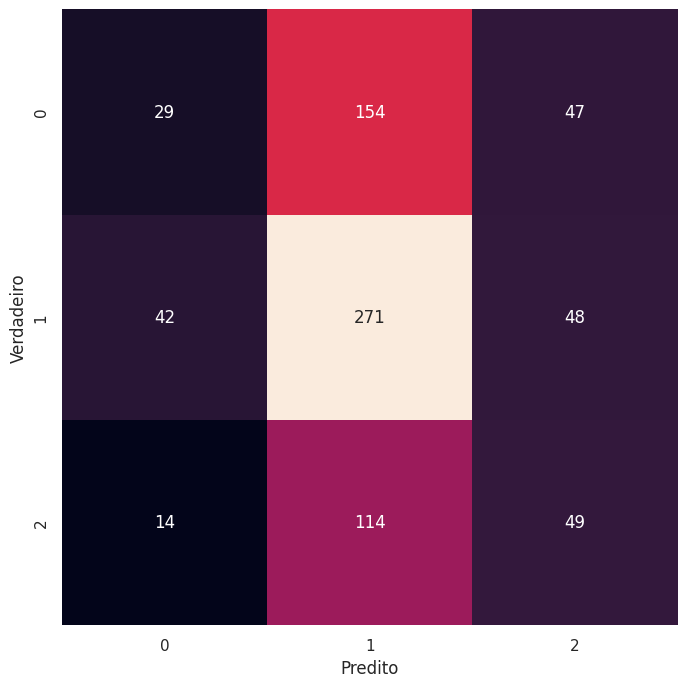

In [ ]:
nomes = np.unique(adab_predict)
matriz_adab = confusion_matrix(y_teste,  adab_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_adab , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## LightGBM

In [ ]:
import lightgbm as lgb

###Bayesian Optimization - Otimização Bayesiana

In [ ]:
from skopt import gp_minimize

In [ ]:
def treinar_lgbm(params):

  learning_rate = params[0]
  max_depth = params[1]
  subsample = params[2]
  min_child_weight = params[3]
  num_parallel_tree = params[4]
  n_estimators = params[5]

  print(params)

  mo_lgbm = lgb.LGBMClassifier( learning_rate = learning_rate, max_depth = max_depth,
                         subsample = subsample, min_child_weight = min_child_weight, 
                         num_parallel_tree = num_parallel_tree, n_estimators=n_estimators, random_state=10)
  
  
  re = mo_lgbm.fit(x_treino_pad, y_treino_pad)                    
  return -re.score(x_teste_pad, y_teste_pad)

In [ ]:
space_lgbm =[(0.01, 0.11), # learning_rate
        (1,30), # max_depth
        (0.5,1), # subsample
        (1,10), # min_child_weight
        (1,15), # num_parallel_tree 
        (100, 1000)] # n_estimators

In [ ]:
gp_resultados_lgbm = gp_minimize(treinar_lgbm,space_lgbm,random_state=10,verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.03987611518856283, 15, 0.7215074738443042, 8, 9, 123]
[LightGBM] [Warning] Unknown parameter: num_parallel_tree
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3495
Function value obtained: -0.4635
Current minimum: -0.4635
Iteration No: 2 started. Evaluating function at random point.
[0.08092080098430121, 9, 0.6318014230144762, 2, 11, 835]
[LightGBM] [Warning] Unknown parameter: num_parallel_tree
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.0981
Function value obtained: -0.4141
Current minimum: -0.4635
Iteration No: 3 started. Evaluating function at random point.
[0.0436071584464552, 27, 0.5990609065164851, 1, 13, 755]
[LightGBM] [Warning] Unknown parameter: num_parallel_tree
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.1200
Function value obtained: -0.4362
Current minimum: -0.4635
Iteration No: 4 started. Evaluating function at random point.
[0.06408

In [ ]:
gp_resultados_lgbm.x

[0.11, 1, 0.8820140007255399, 4, 2, 100]

### Avaliando Modelo

In [ ]:
modelo_lgbm_ava = lgb.LGBMClassifier( learning_rate =0.11, max_depth =1 ,
                         subsample = 0.8820140007255399, min_child_weight =4 , 
                         num_parallel_tree = 2, n_estimators=100, random_state=10)

In [ ]:
modelo_lgbm_ava.fit(x_treino_pad, y_treino_pad)

[LightGBM] [Warning] Unknown parameter: num_parallel_tree


LGBMClassifier(learning_rate=0.11, max_depth=1, min_child_weight=4,
               num_parallel_tree=2, random_state=10,
               subsample=0.8820140007255399)

In [ ]:
lgbm_predict = modelo_lgbm_ava.predict(x_teste_pad)

In [ ]:
print(classification_report(y_teste_pad,lgbm_predict))

              precision    recall  f1-score   support

           0       0.60      0.01      0.03       230
           1       0.52      0.91      0.66       361
           2       0.42      0.31      0.35       177

    accuracy                           0.50       768
   macro avg       0.51      0.41      0.35       768
weighted avg       0.52      0.50      0.40       768



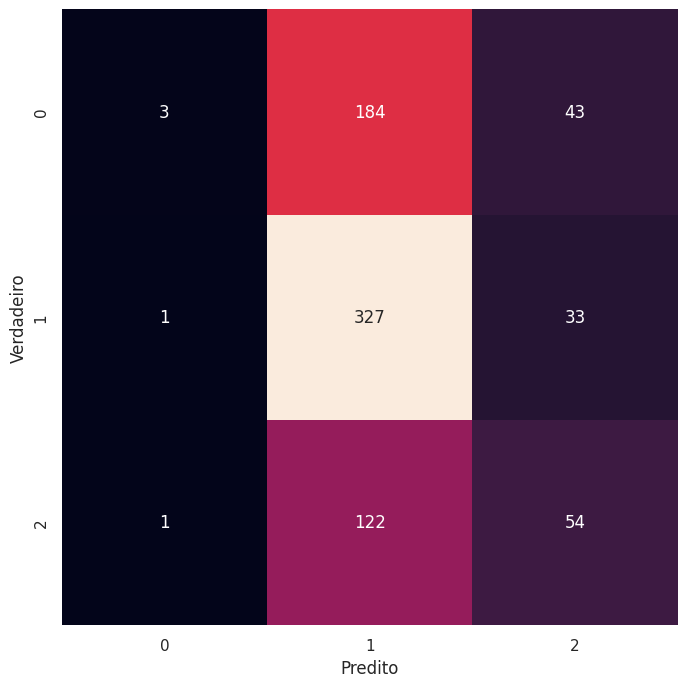

In [ ]:
nomes = np.unique(lgbm_predict)
matriz_lgbm = confusion_matrix(y_teste,  lgbm_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_lgbm , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## XGboost

In [ ]:
from xgboost import XGBClassifier

###Bayesian Optimization - Otimização Bayesiana

In [ ]:
from skopt import gp_minimize

In [ ]:
def treinar_xgb(params):

  learning_rate = params[0]
  max_depth = params[1]
  subsample = params[2]
  min_child_weight = params[3]
  num_parallel_tree = params[4]
  n_estimators = params[5]

  print(params)

  mo_xgb = XGBClassifier( learning_rate = learning_rate, max_depth = max_depth,
                         subsample = subsample, min_child_weight = min_child_weight, 
                         num_parallel_tree = num_parallel_tree, n_estimators=n_estimators, random_state=10)
  
  
  re = mo_xgb.fit(x_treino_pad, y_treino_pad)                    
  return -re.score(x_teste_pad, y_teste_pad)

In [ ]:
space_xgb =[(0.01, 0.11), # learning_rate
        (1,30), # max_depth
        (0.5,1), # subsample
        (1,10), # min_child_weight
        (1,15), # num_parallel_tree 
        (100, 1000)] # n_estimators

In [ ]:
gp_resultados_xgb = gp_minimize(treinar_xgb,space_xgb,random_state=10,verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.03987611518856283, 15, 0.7215074738443042, 8, 9, 123]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 20.8176
Function value obtained: -0.4635
Current minimum: -0.4635
Iteration No: 2 started. Evaluating function at random point.
[0.08092080098430121, 9, 0.6318014230144762, 2, 11, 835]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 105.7121
Function value obtained: -0.4336
Current minimum: -0.4635
Iteration No: 3 started. Evaluating function at random point.
[0.0436071584464552, 27, 0.5990609065164851, 1, 13, 755]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 220.4610
Function value obtained: -0.4336
Current minimum: -0.4635
Iteration No: 4 started. Evaluating function at random point.
[0.06408809312773928, 5, 0.7068336872092265, 8, 9, 264]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 14.3891
Function value obtained: -0.4701
Current mini

In [ ]:
gp_resultados_xgb.x

[0.08229071024147719, 1, 0.9730473618784231, 6, 7, 227]

### Avaliando Modelo

In [ ]:
modelo_xgb_ava =XGBClassifier( learning_rate = 0.08229071024147719, max_depth = 1,
                         subsample = 0.9730473618784231, min_child_weight =6, 
                         num_parallel_tree = 7, n_estimators=227, random_state=10)

In [ ]:
modelo_xgb_ava.fit(x_treino_pad, y_treino_pad)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08229071024147719,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=227, n_jobs=None, num_parallel_tree=7,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb_predict = modelo_xgb_ava.predict(x_teste_pad)

In [ ]:
print(classification_report(y_teste_pad,xgb_predict))

              precision    recall  f1-score   support

           0       0.75      0.01      0.03       230
           1       0.52      0.90      0.66       361
           2       0.41      0.31      0.35       177

    accuracy                           0.50       768
   macro avg       0.56      0.41      0.35       768
weighted avg       0.56      0.50      0.40       768



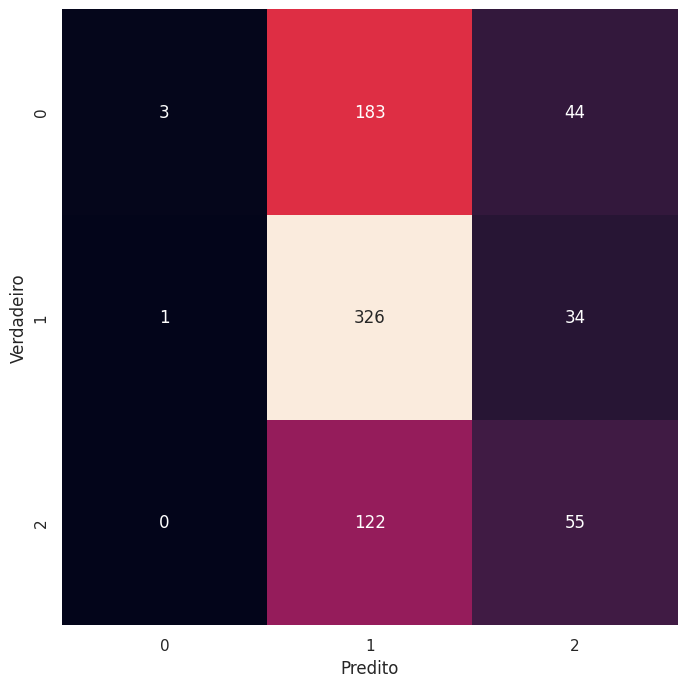

In [ ]:
nomes = np.unique(xgb_predict)
matriz_xgb = confusion_matrix(y_teste,  xgb_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_xgb , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');